<a href="https://colab.research.google.com/github/gorobecb/MIAD-labs/blob/main/Lab3_MIAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Воробйов Андрій, ІПЗм-24-2, Варіант 7

---

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.ticker
import matplotlib.pyplot as plt
import seaborn as sns
# ігноруємо warnings
import warnings
warnings.filterwarnings("ignore")

DATASET_PATH='mlbootcamp_train_Soroka.csv'
IMDB_DATASET_PATH='movies.csv'

sns.set_context("notebook",font_scale = 1.2, rc = {\
 "figure.figsize" : (12, 9),\
 "axes.titlesize" : 14\
})


## Практична частина

In [ ]:
df = pd.read_csv("mlbootcamp_train_Soroka.csv", sep=";")

quantitative_features = []
categorical_features = []
feature_summary = []

for c in df.columns:
    n_unique = df[c].nunique()
    if n_unique <= 3:
        feature_type = "Categorical"
        categorical_features.append(c)
    elif c.lower() != 'id':
        feature_type = "Quantitative"
        quantitative_features.append(c)
    else:
        feature_type = "Ignore"

    feature_summary.append({
        "Feature": c,
        "Unique values": n_unique,
        "Type": feature_type
    })

feature_df = pd.DataFrame(feature_summary)
print(f'Кількісних ознак: {len(quantitative_features)}')
print(f'Категоріальних ознак: {len(categorical_features)}')
display(feature_df)


Кількісних ознак: 5
Категоріальних ознак: 7


,Feature,Unique values,Type
0,id,70000,Ignore
1,age,8076,Quantitative
2,gender,2,Categorical
3,height,109,Quantitative
4,weight,287,Quantitative
5,ap_hi,153,Quantitative
6,ap_lo,157,Quantitative
7,cholesterol,3,Categorical
8,gluc,3,Categorical
9,smoke,2,Categorical


### 1. Кореляційна матриця

<Axes: >

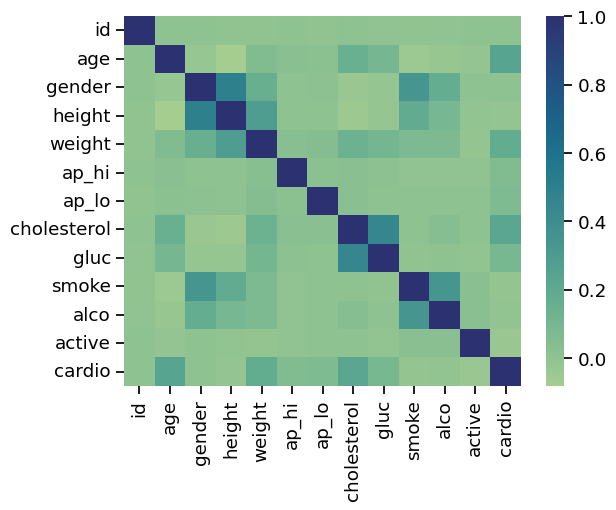

In [ ]:
sns.heatmap(df.corr(), cmap='crest')

### 2. Візуалізація даних значень, які приймають категоріальні змінні

490000


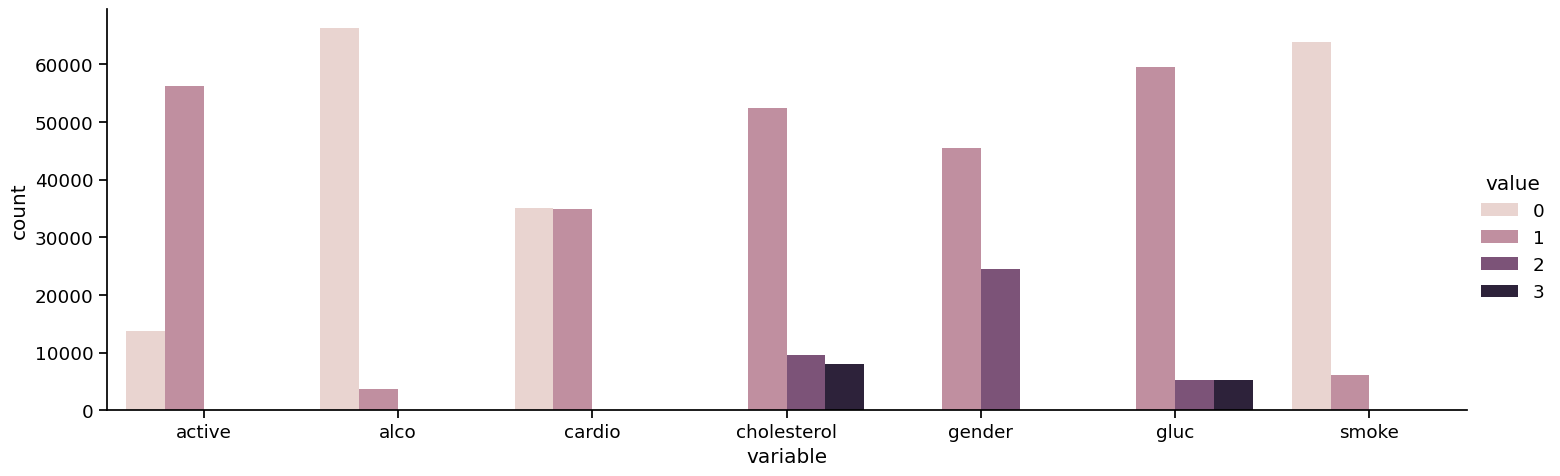

In [ ]:
df_uniques = pd.melt(frame=df, value_vars=['gender','cholesterol','gluc', 'smoke', 'alco','active', 'cardio'])
print(len(df_uniques))
df_uniques = pd.DataFrame(df_uniques.groupby(['variable','value'])['value'].count())\
.sort_index(level=[0, 1]) \
.rename(columns={'value': 'count'}) \
.reset_index()
sns.catplot(x='variable', y='count', hue='value', data=df_uniques, kind='bar', aspect=3)

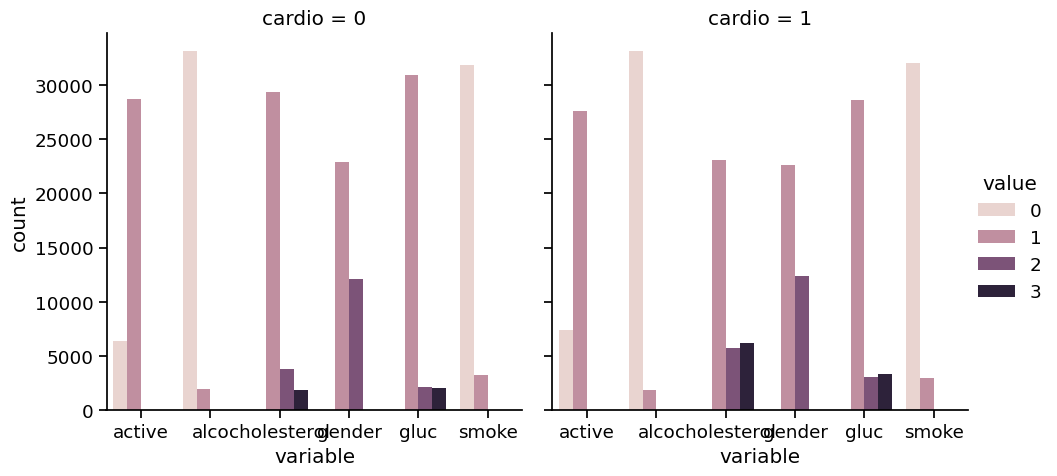

In [ ]:
df_uniques = pd.melt(frame=df, value_vars=['gender','cholesterol','gluc','smoke', 'alco', 'active'],id_vars=['cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 'value', 'cardio'])['value'].count()) \
.sort_index(level=[0, 1]) \
.rename(columns={'value': 'count'}) \
.reset_index()
sns.catplot(x='variable', y='count', hue='value', col='cardio', data=df_uniques, kind='bar')

### 3. Розподіл росту людини за гендерною ознакою

In [ ]:
longformat = pd.melt(frame=df, value_vars='height',
id_vars='gender')
longformat.head()

,gender,variable,value
0,2,height,168
1,1,height,156
2,1,height,165
3,2,height,169
4,1,height,156


<Axes: xlabel='height', ylabel='Density'>

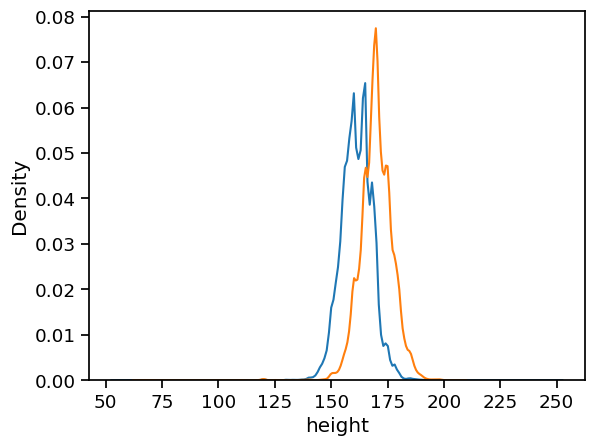

In [ ]:
sns.kdeplot(df[df['gender'] == 1]['height'])
sns.kdeplot(df[df['gender'] == 2]['height'])

### 4. Рангова кореляція

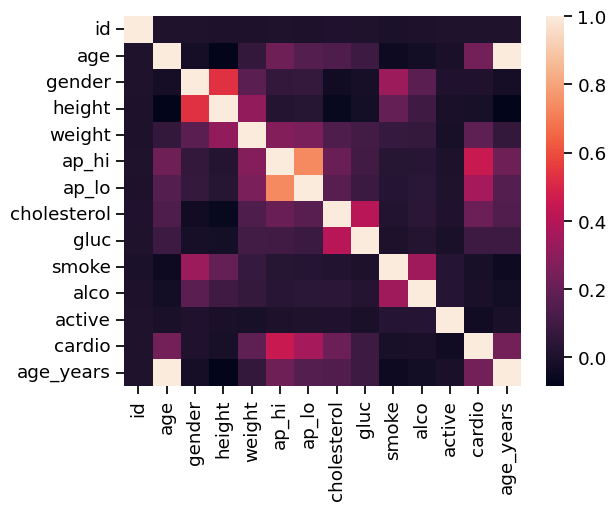

In [ ]:
sns.heatmap(df.corr(method='spearman'));

Найбільше корелюють:
1. Стать і зріст
2. Верхній і нижній тиск
3. Високий тиск і захворювання
4. Холестерол і глюкоза
5. Куріння і стать

### 5. Вік

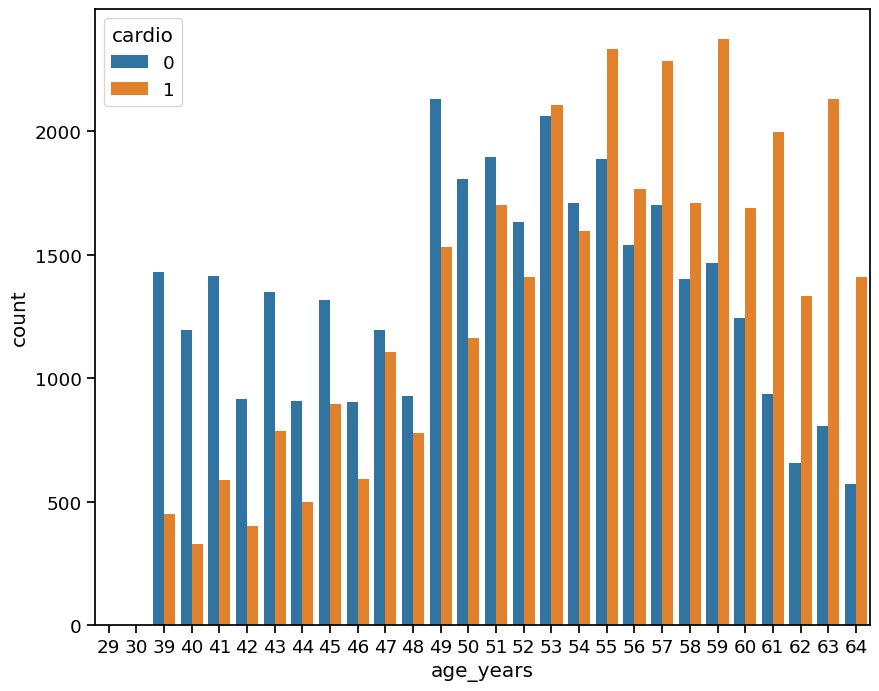

In [ ]:
df['age_years'] = (df['age'] // 365.25).astype(int)
plt.figure(figsize=(10, 8))
sns.countplot(x='age_years', hue='cardio', data=df);

*В якому віці кількість пацієнтів з ССЗ вперше стає більше, ніж здорових?* - згідно з даними, в **53 роки**

## Завдання
Провести розвідувальний і візуальний аналіз за
варіантами *(7 - Топ 100 фільмів)*

In [ ]:
df = pd.read_csv(IMDB_DATASET_PATH, quotechar='"')

rating_map = {
    'Approved': -1,
    'Passed': -1,
    'GP': -1,
    'G': 0,
    'PG': 1,
    'PG-13': 2,
    'R': 3,
    'NC-17': 4
}

df['year_of_release'] = df['year_of_release'].apply(lambda y: y.replace('(', '').replace(')', ''))
df['gross_total'] = df['gross_total'].apply(lambda g: str(g).replace('$', '').replace('M', ''))
df['run_time'] = df['run_time'].apply(lambda t: t.replace(' min', ''))
df['votes'] = df['votes'].apply(lambda v: v.replace(',', ''))
df['category_numeric'] = df['category'].map(rating_map)

df = df.astype({ 'year_of_release': int, 'gross_total': float, 'run_time': int, 'votes': int })

df.tail(10)
#df.info()

,index,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total,category_numeric
89,90.0,The Piano,1993,R,121,"Drama, Music, Romance",7.5,89819,40.16,3
90,91.0,Mystic River,2003,R,138,"Crime, Drama, Mystery",7.9,459918,90.14,3
91,92.0,The Insider,1999,R,157,"Biography, Drama, Thriller",7.8,172759,28.97,3
92,93.0,L.A. Confidential,1997,R,138,"Crime, Drama, Mystery",8.2,585555,64.62,3
93,94.0,Heat,1995,R,170,"Action, Crime, Drama",8.3,658033,67.44,3
94,95.0,The Usual Suspects,1995,R,106,"Crime, Drama, Mystery",8.5,1087832,23.34,3
95,96.0,Cool Hand Luke,1967,GP,127,"Crime, Drama",8.1,178888,16.22,-1
96,97.0,Eternal Sunshine of the Spotless Mind,2004,R,108,"Drama, Romance, Sci-Fi",8.3,1011004,34.40,3
97,98.0,City Lights,1931,G,87,"Comedy, Drama, Romance",8.5,186059,0.02,0
98,99.0,The Matrix,1999,R,136,"Action, Sci-Fi",8.7,1916083,171.48,3


In [ ]:
df.describe()

,index,year_of_release,run_time,imdb_rating,votes,gross_total,category_numeric
count,99.000000,99.000000,99.000000,99.000000,9.900000e+01,98.000000,99.000000
mean,50.000000,1988.636364,133.626263,8.348485,9.348533e+05,117.426531,2.111111
std,28.722813,20.326646,27.777757,0.368772,5.800565e+05,140.720922,1.292750
min,1.000000,1931.000000,87.000000,7.200000,1.074800e+04,0.020000,-1.000000
25%,25.500000,1979.000000,115.500000,8.100000,5.105850e+05,28.280000,1.500000
50%,50.000000,1995.000000,130.000000,8.300000,8.348420e+05,68.770000,3.000000
75%,74.500000,2003.000000,147.500000,8.600000,1.224917e+06,160.622500,3.000000
max,99.000000,2015.000000,238.000000,9.300000,2.683302e+06,936.660000,3.000000


<Axes: >

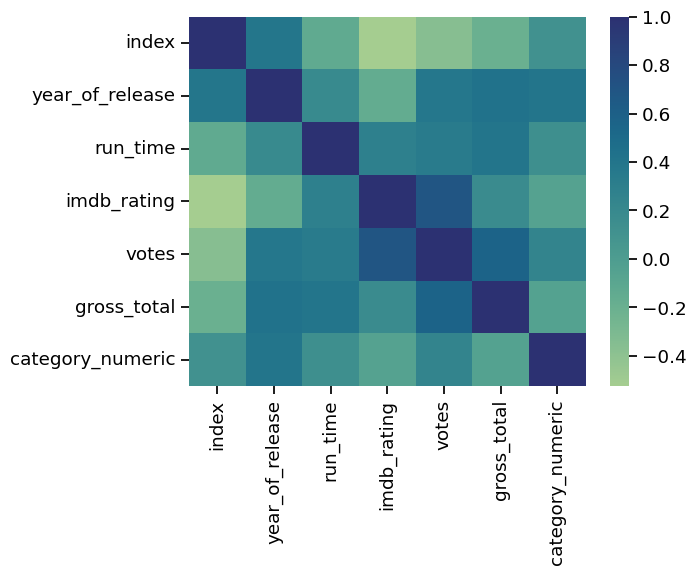

In [ ]:
sns.heatmap(df.corr(method="spearman", numeric_only=True), cmap="crest")

По кореляційній матриці видно кореляції між:
* Рейтинг і кількість голосів
* Вікова категорія і рік фільму
Певна кореляція:
* Доходи і к-сть голосів
* Доходи і рік випуску

array([<Axes: ylabel='count'>], dtype=object)

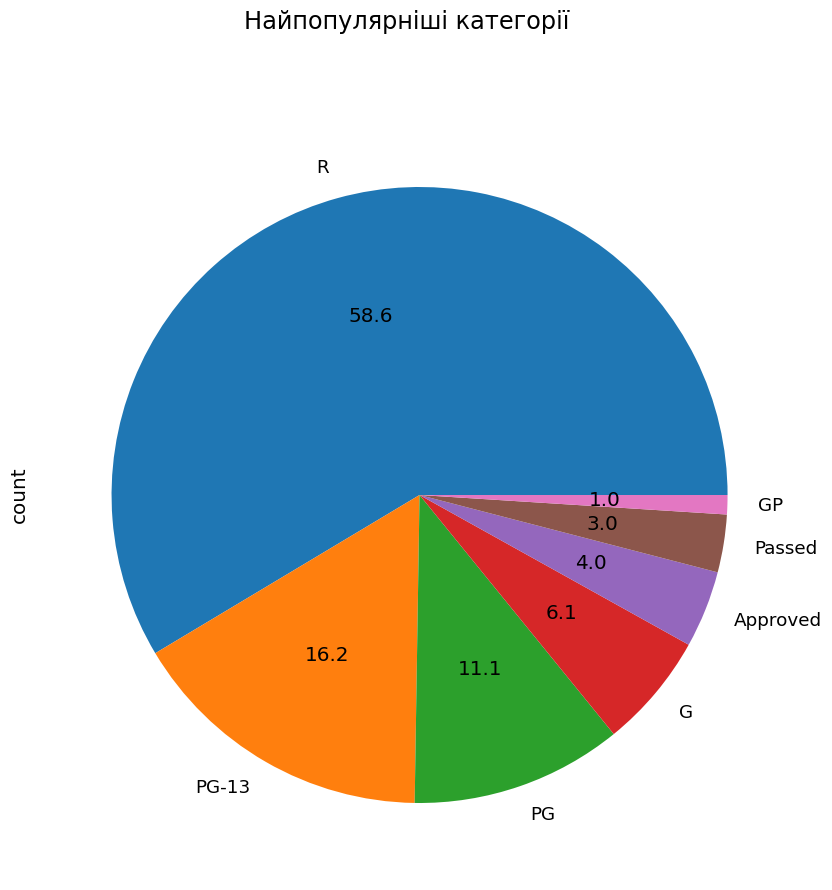

In [ ]:
df['category'].value_counts().plot(kind='pie', subplots=True, autopct='%1.1f', figsize=(10,10), title='Найпопулярніші категорії')

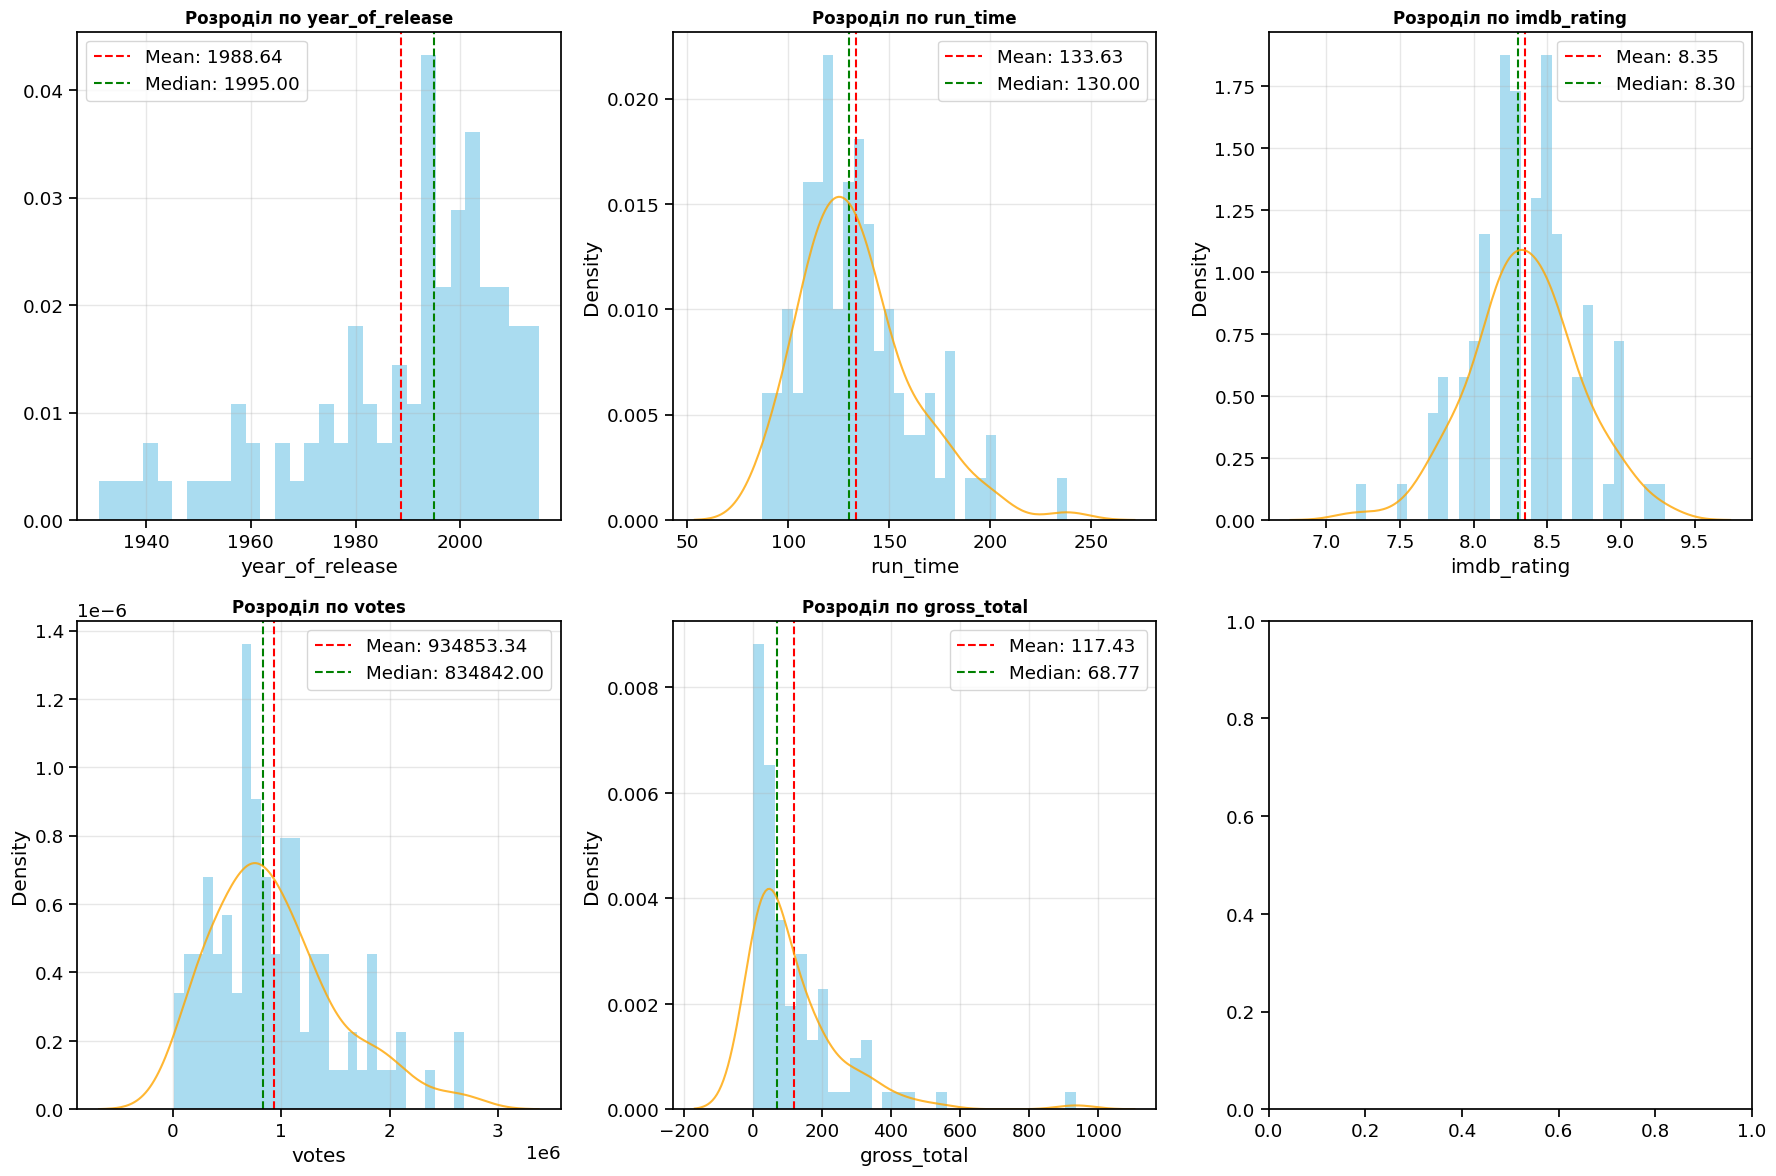

In [ ]:
    numerical_cols = ['year_of_release', 'run_time', 'imdb_rating', 'votes', 'gross_total']

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.ravel()

    for i, col in enumerate(numerical_cols):
        axes[i].hist(df[col].dropna(), bins=30, alpha=0.7, density=True, color='skyblue')
        axes[i].axvline(df[col].mean(), color='red', linestyle='--', label=f'Mean: {df[col].mean():.2f}')
        axes[i].axvline(df[col].median(), color='green', linestyle='--', label=f'Median: {df[col].median():.2f}')

        if col != 'year_of_release':
            sns.kdeplot(data=df[col].dropna(), ax=axes[i], color='orange', alpha=0.8)

        axes[i].set_title(f'Розроділ по {col}', fontsize=12, fontweight='bold')
        axes[i].set_xlabel(col)
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

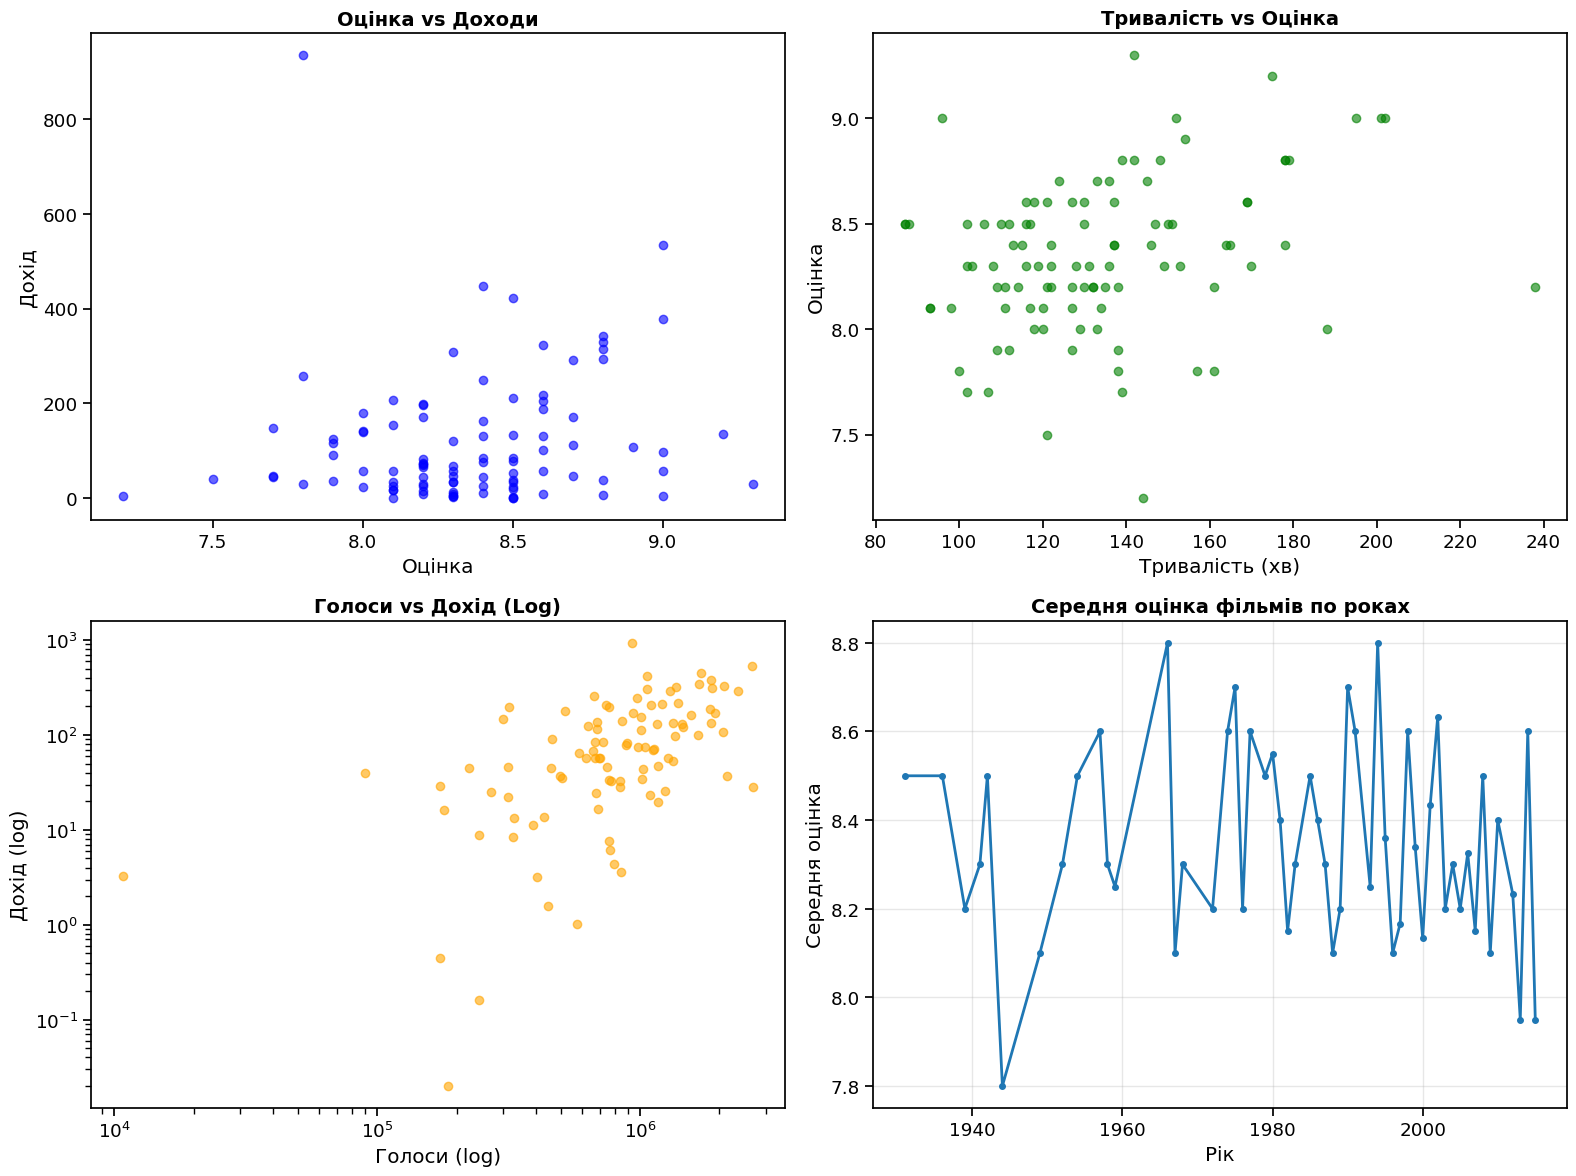

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

axes[0,0].scatter(df['imdb_rating'], df['gross_total'], alpha=0.6, color='blue')
axes[0,0].set_xlabel('Оцінка')
axes[0,0].set_ylabel('Дохід')
axes[0,0].set_title('Оцінка vs Доходи', fontweight='bold')

z = np.polyfit(df['imdb_rating'], df['gross_total'], 1)
p = np.poly1d(z)
axes[0,0].plot(df['imdb_rating'], p(df['imdb_rating']), "r--", alpha=0.8)

axes[0,1].scatter(df['run_time'], df['imdb_rating'], alpha=0.6, color='green')
axes[0,1].set_xlabel('Тривалість (хв)')
axes[0,1].set_ylabel('Оцінка')
axes[0,1].set_title('Тривалість vs Оцінка', fontweight='bold')

axes[1,0].scatter(df['votes'], df['gross_total'], alpha=0.6, color='orange')
axes[1,0].set_xscale('log')
axes[1,0].set_yscale('log')
axes[1,0].set_xlabel('Голоси (log)')
axes[1,0].set_ylabel('Дохід (log)')
axes[1,0].set_title('Голоси vs Дохід (Log)', fontweight='bold')

yearly_avg = df.groupby('year_of_release')['imdb_rating'].mean()
axes[1,1].plot(yearly_avg.index, yearly_avg.values, marker='o', linewidth=2, markersize=4)
axes[1,1].set_xlabel('Рік')
axes[1,1].set_ylabel('Середня оцінка')
axes[1,1].set_title('Середня оцінка фільмів по роках', fontweight='bold')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()